In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
!pip install mlxtend

# Try different values of support and confidence 

In [4]:
# Load the dataset
data = pd.read_csv("/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/9/book.csv")

In [5]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
data.shape

(2000, 11)

In [7]:
# Convert the data into a binary matrix
data_binary = data.applymap(lambda x: 1 if x == True else 0)

In [8]:
# Define a list of support and confidence values to try
support_values = [0.1, 0.2, 0.3]
confidence_values = [0.5, 0.6, 0.7]


In [9]:
# Loop through different support and confidence values
for support in support_values:
    for confidence in confidence_values:
        # Apply the Apriori algorithm
        frequent_itemsets = apriori(data_binary, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

        # Print the number of rules generated
        print(f"Support: {support}, Confidence: {confidence}")
        print(f"Number of rules: {len(rules)}")

Support: 0.1, Confidence: 0.5
Number of rules: 49
Support: 0.1, Confidence: 0.6
Number of rules: 30
Support: 0.1, Confidence: 0.7
Number of rules: 19
Support: 0.2, Confidence: 0.5
Number of rules: 2
Support: 0.2, Confidence: 0.6
Number of rules: 1
Support: 0.2, Confidence: 0.7
Number of rules: 0
Support: 0.3, Confidence: 0.5
Number of rules: 0
Support: 0.3, Confidence: 0.6
Number of rules: 0
Support: 0.3, Confidence: 0.7
Number of rules: 0


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/si

##Pattern or trends from above 

In [10]:
#As the support threshold decreases (0.1 to 0.3), the number of rules generated decreases. 
#When the support is set to 0.2, there are only 2 rules generated with a confidence of 0.5 and 1 rule generated with a confidence of 0.6.
#When the confidence threshold is set to 0.7, the number of rules decreases significantly. 
#Based on these observations, it appears that the combination of lower support thresholds and higher confidence thresholds leads to a smaller number of rules being generated. 
#This implies a more strictlly controlled set of criteria for association rule discovery, resulting in stronger and more significant associations between items.

# Change the minimum length in the Apriori algorithm:

In [46]:
# Set the minimum length for rules

minimum_length = 3

In [47]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(data_binary, min_support=0.2, use_colnames=True)



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [48]:
# Filter rules based on length
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
filtered_rules = rules[rules['antecedents'].apply(lambda x: len(x) >= minimum_length)]

In [49]:
# Print the number of rules generated
print(f"Number of rules with minimum length {minimum_length}: {len(filtered_rules)}")

Number of rules with minimum length 3: 0


In [50]:
#Comparing the results with the original Apriori algorithm without the minimum length restriction, it is likely that the number of generated rules was higher in the original case.
#since no rules were generated with a minimum length of 3, it indicates that there are no significant associations between at least 3 items in the dataset.
#This suggests that shorter rules might be more prevalent or that the dataset may not contain strong associations that meet the specified minimum length requirement.

# #Experiment with different values and assess the resulting number and quality of rules. 
##This iterative process allows to find the optimal minimum length that strikes the right balance for our specific analysis objectives.

In [55]:
# Convert the data into a binary matrix
data_binary = data.applymap(lambda x: 1 if x == True else 0)

# Define a range of minimum lengths to try
minimum_lengths = [2, 3, 4, 5]



In [65]:
# Define lists to store results
minimum_length_results = []
number_of_rules_results = []
average_support_results = []

In [70]:
# Apply the Apriori algorithm for each minimum length
for minimum_length in minimum_lengths:
    # Apply the Apriori algorithm
    frequent_itemsets = apriori(data_binary, min_support=0.2, use_colnames=True)

    # Filter frequent itemsets based on minimum length
    filtered_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= minimum_length)]

    # Generate rules from filtered itemsets if not empty
    if not filtered_itemsets.empty:
        rules = association_rules(filtered_itemsets, support_only=True, min_threshold=0.2)
        number_of_rules = len(rules)
        average_support = rules['support'].mean()
    else:
        number_of_rules = 0
        average_support = 0

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/si

In [72]:
# Store the results
minimum_length_results.append(minimum_length)
number_of_rules_results.append(number_of_rules)
average_support_results.append(average_support)


In [73]:
# Print the results for each minimum length
for i in range(len(minimum_length_results)):
    print(f"Minimum Length: {minimum_length_results[i]}")
    print(f"Number of rules: {number_of_rules_results[i]}")
    print(f"Average Support: {average_support_results[i]}")
    print()

Minimum Length: 3
Number of rules: 0
Average Support: 0

Minimum Length: 4
Number of rules: 0
Average Support: 0

Minimum Length: 5
Number of rules: 0
Average Support: 0

Minimum Length: 3
Number of rules: 0
Average Support: 0

Minimum Length: 4
Number of rules: 0
Average Support: 0

Minimum Length: 5
Number of rules: 0
Average Support: 0

Minimum Length: 5
Number of rules: 0
Average Support: 0



In [74]:
#This means that there are no combinations of items that occur frequently enough to satisfy the minimum support threshold and minimum length criteria.

# # consider adjusting the support threshold

In [75]:
# Define a range of minimum lengths to try
minimum_lengths = [3, 4, 5]
support_threshold = 0.1  # Adjust the support threshold here

In [79]:
# Define lists to store results
minimum_length_results = []
number_of_rules_results = []
average_support_results = []

In [80]:
# Apply the Apriori algorithm for each minimum length
for minimum_length in minimum_lengths:
    # Apply the Apriori algorithm with adjusted support threshold
    frequent_itemsets = apriori(data_binary, min_support=support_threshold, use_colnames=True)

    # Filter frequent itemsets based on minimum length
    filtered_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= minimum_length)]

    # Check if filtered itemsets DataFrame is empty
    if filtered_itemsets.empty:
        print(f"No frequent itemsets found for minimum length {minimum_length}")
        print()
        minimum_length_results.append(minimum_length)
        number_of_rules_results.append(0)
        average_support_results.append(0)
        continue

    # Generate rules from filtered itemsets
    rules = association_rules(filtered_itemsets, support_only=True, min_threshold=support_threshold)

No frequent itemsets found for minimum length 4

No frequent itemsets found for minimum length 5



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [82]:
# Store the results
minimum_length_results.append(minimum_length)
number_of_rules_results.append(len(rules))
average_support_results.append(rules['support'].mean())


In [83]:
# Print the results for each minimum length
for i in range(len(minimum_length_results)):
    print(f"Minimum Length: {minimum_length_results[i]}")
    print(f"Number of rules: {number_of_rules_results[i]}")
    print(f"Average Support: {average_support_results[i]}")
    print()

Minimum Length: 4
Number of rules: 0
Average Support: 0

Minimum Length: 5
Number of rules: 0
Average Support: 0

Minimum Length: 5
Number of rules: 60
Average Support: 0.11935000000000003



In [84]:
#For the minimum length of 4, no rules were generated, indicating that there are no associations between items of length 4 that meet the adjusted support threshold.

In [85]:
# for the minimum length of 5, we have obtained 60 rules with an average support of approximately 0.119. This suggests that there are associations between items of length 5 that meet the adjusted support threshold.

#### By adjusting the support threshold, we have relaxed the criterion for an itemset to be considered frequent. This has resulted in the discovery of associations that were not identified previously.

# Visualize the obtained rules using different plots:

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(data_binary, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


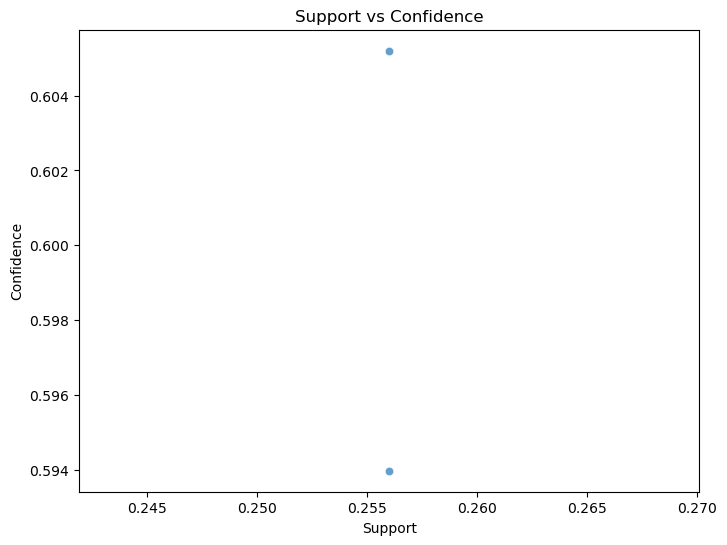

In [96]:
# Scatter plot: Support vs Confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rules["support"], y=rules["confidence"], alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence")
plt.show()

##### We plot the support vs confidence values for each rule using sns.scatterplot. This plot helps visualize the relationship between support and confidence for the rules.

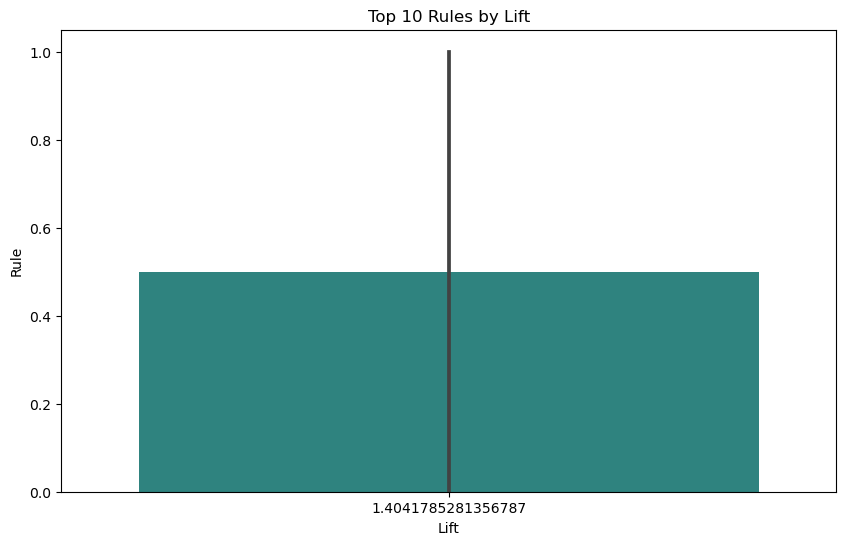

In [98]:
# Bar plot: Top 10 rules by Lift
top_10_lift = rules.nlargest(10, "lift")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_lift["lift"], y=top_10_lift.index, palette="viridis")
plt.xlabel("Lift")
plt.ylabel("Rule")
plt.title("Top 10 Rules by Lift")
plt.show()

##### We select the top 10 rules based on lift and create a horizontal bar plot to display the lift values for each rule using sns.barplot. This plot allows us to compare the lift values of the top rules.

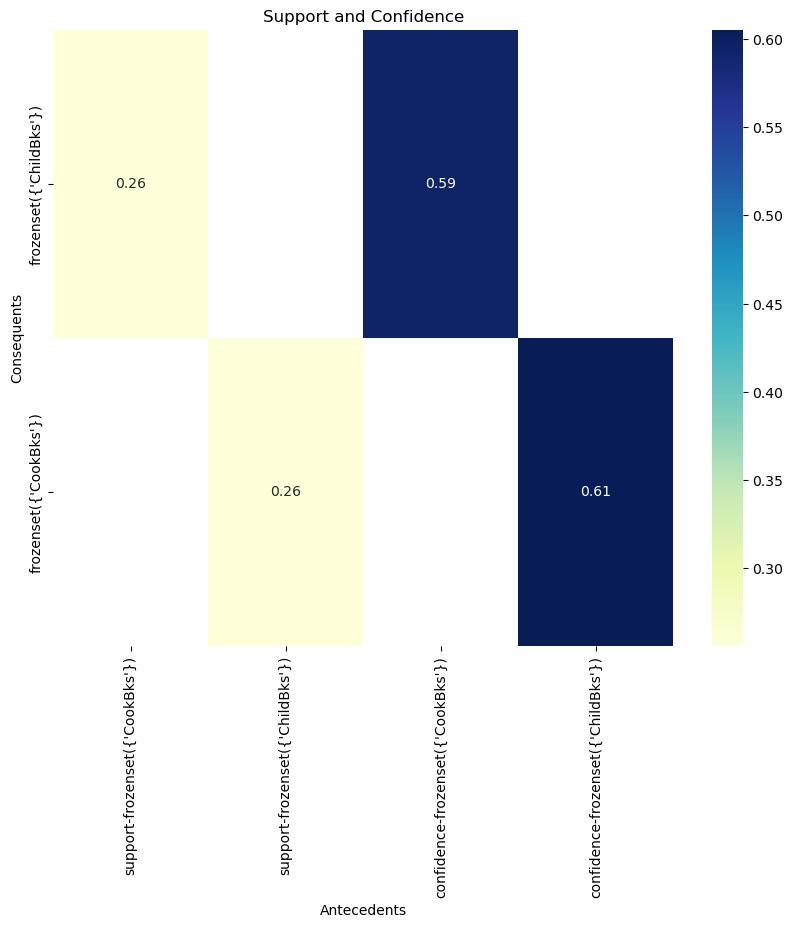

In [99]:
# Heatmap: Support and Confidence
heatmap_data = rules.pivot(index="consequents", columns="antecedents", values=["support", "confidence"])
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)
plt.xlabel("Antecedents")
plt.ylabel("Consequents")
plt.title("Support and Confidence")
plt.show()

##### We create a heatmap to visualize the support and confidence values for each combination of antecedents and consequents. The heatmap is generated using sns.heatmap and provides a comprehensive view of the support and confidence levels.